In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

In [185]:
path = './okt_beta/*'
Β = []    
d = {}
for i in range(len(glob(path))):
    #print(glob('./may_beta/*')[i][-6:-4])
    β = glob(path)[i][-6:-4]
    B = Β.append(glob(path)[i][-6:-4])

for β in Β:
    d[β] = pd.read_csv(
        path[:-1]+"/beta"+β+".csv",
    )

In [186]:
df_β = pd.DataFrame(columns = ['R_exp_mean', 'R_STD_mean'])
for β in Β[1:]:
    df_β = df_β.append(pd.DataFrame({
            'R_exp_mean' : d[β].R_exp.mean(),
            'R_STD_mean' : d[β].R_STD.mean(),
        },
        index = [float(β)*.1])
    )

[]

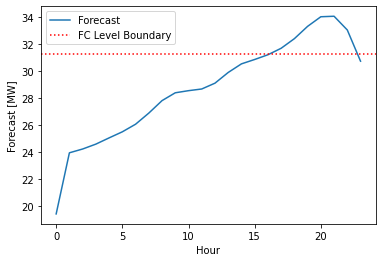

In [187]:
fig, ax = plt.subplots(1)
ax.plot(
    d["00"].q_FC,
    label = 'Forecast',
)
ax.set(
    xlabel="Hour",
    ylabel="Forecast [MW]"
)
ax.axhline(
    y=1250*0.025,
    linestyle=':',
    color = 'red',
    label = 'FC Level Boundary'
)
plt.legend()
# plt.savefig('2016-10-13_FC.pdf')
plt.plot()

[]

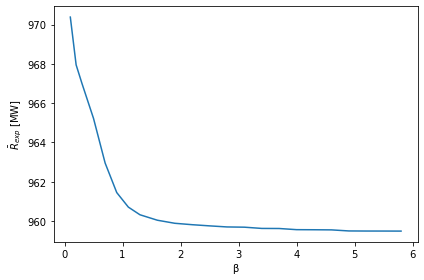

In [191]:
fig, ax = plt.subplots(1)
ax.plot(df_β.R_exp_mean)
ax.set(
    xlabel="β",
    ylabel=r"$\barR_{exp}$ [MW]"
)
plt.tight_layout()
# plt.savefig('2016-10-13_Rexp_beta.pdf')
plt.plot()

[]

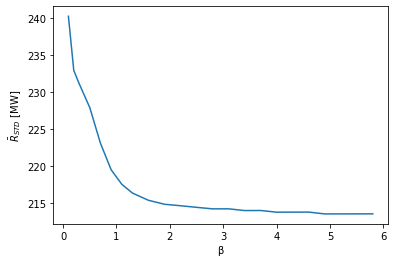

In [192]:
fig, ax = plt.subplots(1)
ax.plot(df_β.R_STD_mean)
ax.set(
    xlabel="β",
    ylabel=r"$\barR_{STD}$ [MW]"
)
# plt.savefig('2016-10-13_Rstd_beta.pdf')
plt.plot()

[]

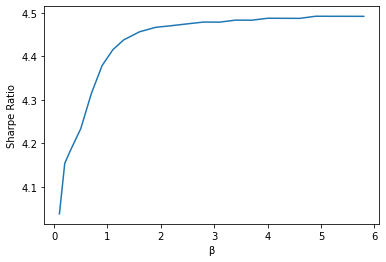

In [193]:
fig, ax = plt.subplots(1)
ax.plot(df_β.R_exp_mean/df_β.R_STD_mean)
ax.set(
    xlabel="β",
    ylabel=r"Sharpe Ratio"
)
# plt.savefig('2016-10-13_Sharpe_beta.pdf')
plt.plot()